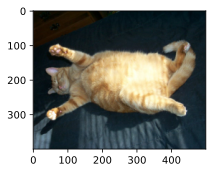

In [1]:
%matplotlib inline
import torch 
import torchvision
import matplotlib as plt
from torch import nn
from d2l import torch as d2l
from torch.nn import functional as F
d2l.set_figsize()
img=d2l.Image.open('../data/cat1.jpg')
d2l.plt.imshow(img)

In [2]:
def apply(img,aug,num_rows=2,num_columns=4,scale=1.5):
    y=[aug(img) for _ in range(num_rows*num_columns)]
    d2l.show_images(y,num_rows,num_columns,scale=scale)

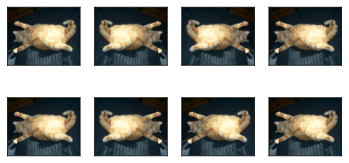

In [3]:
"""左右翻转图像"""
apply(img,torchvision.transforms.RandomHorizontalFlip())

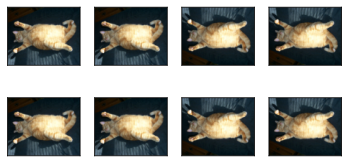

In [4]:
"""上下翻转图像"""
apply(img,torchvision.transforms.RandomVerticalFlip())

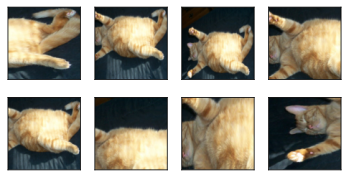

In [5]:
"""随机裁剪"""
shape_aug=torchvision.transforms.RandomResizedCrop(size=(200,200),scale=(0.1,1),ratio=(0.5,2))
apply(img,shape_aug)

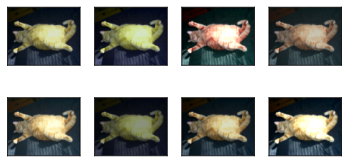

In [6]:
"""随机更改图像的亮度(brightness)、对比度(contrast)、饱和度(saturation)和色调(hue),增加或减少对应的值"""
color_aug=torchvision.transforms.ColorJitter(brightness=0.5,contrast=0.2,saturation=0.1,hue=0.1)
apply(img,color_aug)

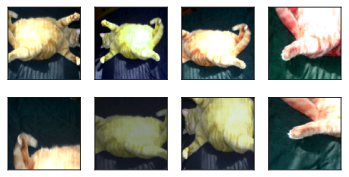

In [7]:
"""组合多种"""
apply(img,torchvision.transforms.Compose([torchvision.transforms.RandomHorizontalFlip(),shape_aug,color_aug]))

Files already downloaded and verified


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

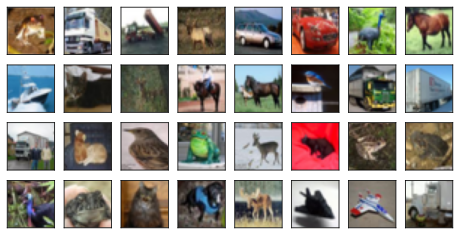

In [8]:
all_images=torchvision.datasets.CIFAR10(train=True,root='../data/cifar10',download=True)
d2l.show_images((all_images[i][0] for i in range(32)),4,8,scale=1)

In [12]:
normalize = torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
train_augs=torchvision.transforms.Compose([torchvision.transforms.RandomResizedCrop(224),torchvision.transforms.RandomHorizontalFlip(),torchvision.transforms.ToTensor(),normalize])
test_augs=torchvision.transforms.Compose([torchvision.transforms.Resize(256),torchvision.transforms.RandomCrop(224),torchvision.transforms.ToTensor(),normalize])
def load_data(augs,batch_size,is_train):
    dataset=torchvision.datasets.CIFAR10(root='../data/cifar10',train=is_train,transform=augs)
    dataloader=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True,num_workers=4)
    return dataloader
batch_size=256
train_iter=load_data(train_augs,batch_size,is_train=True)
test_iter=load_data(test_augs,batch_size,is_train=False)

In [13]:
"""
class resblock(nn.Module):
    def __init__(self,input_channel,output_channel,use_1x1conv=False,strides=1):
        super().__init__()
        self.conv1=nn.Conv2d(in_channels=input_channel,out_channels=output_channel,stride=strides,padding=1,kernel_size=3)
        self.conv2=nn.Conv2d(in_channels=output_channel,out_channels=output_channel,padding=1,kernel_size=3)
        self.bn1=nn.BatchNorm2d(output_channel)
        self.bn2=nn.BatchNorm2d(output_channel)
        if(use_1x1conv==True):
            self.conv3=nn.Conv2d(in_channels=input_channel,out_channels=output_channel,kernel_size=1,stride=strides)
        else:
            self.conv3=None
    def forward(self,x):
        y=x
        y=F.relu(self.bn1(self.conv1(y)))
        y=self.bn2(self.conv2(y))
        if(self.conv3):
            y+=self.conv3(x)
        else:
            y+=x
        return F.relu(y)
b1 = nn.Sequential(nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
                   nn.BatchNorm2d(64), nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
def res__block(input_channel,output_channel,num,First_block=False):
    blk=[]
    for i in range(num):
        if i==0 and First_block==False:
            blk.append(resblock(input_channel,output_channel,use_1x1conv=True,strides=2))
        else:
            blk.append(resblock(output_channel,output_channel))
    return blk
b2=nn.Sequential(*res__block(64,64,2,First_block=True))
b3=nn.Sequential(*res__block(64,128,2))
b4 = nn.Sequential(*res__block(128, 256, 2))
net=nn.Sequential(b1,b2,b3,b4,nn.AdaptiveAvgPool2d((1,1)),nn.Flatten(),nn.Linear(256,10))
x=torch.randn(4,3,32,32)
for layer in net:
    x=layer(x)
    print(x.shape)"""
net=torchvision.models.resnet18(pretrained=True)
net.fc=nn.Linear(net.fc.in_features,10)
nn.init.xavier_uniform_(net.fc.weight)

c:\Users\fz-ro\.conda\envs\test\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\fz-ro\.conda\envs\test\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Parameter containing:
tensor([[ 0.1069,  0.0053, -0.0393,  ..., -0.0892,  0.0897, -0.0576],
        [-0.0555, -0.0226, -0.0084,  ...,  0.0742,  0.0346,  0.0542],
        [ 0.0979, -0.0279, -0.0287,  ..., -0.0029,  0.0431,  0.0106],
        ...,
        [-0.0764, -0.0790,  0.0556,  ..., -0.0596, -0.0290, -0.0303],
        [-0.1048,  0.0290, -0.0209,  ..., -0.0554, -0.0773,  0.0888],
        [ 0.0062,  0.0540,  0.0103,  ...,  0.0684,  0.0464,  0.0636]],
       requires_grad=True)

KeyboardInterrupt: 

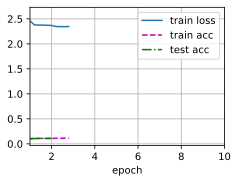

In [14]:
d2l.train_ch6(net,train_iter,test_iter,num_epochs=10,lr=5e-5,device=d2l.try_gpu())